# Explore here

In [ ]:
# - Importe De Librerías:

import pandas as pd

# - Cargar Dataset Desde URL:

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [2]:
# - Contar Duplicados En El DataFrame:

dup_count = df.duplicated().sum()
dup_count

630

In [3]:
# - Eliminar Duplicados Del DataFrame:

df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 39.3+ KB


In [6]:
# - Contar URL's Etiquetadas Como Spam y No Spam:

print(len(df[df['is_spam'] == True]))
print(len(df[df['is_spam'] == False]))

244
2125


In [ ]:
# - Importe De Librerías:

import regex as re

# - Función Para Preprocesar Texto:

def preproc_txt(txt):
    
    txt = re.sub(r'[^a-z ]', " ", txt)
    
    txt = re.sub(r'\s+[a-zA-Z]\s+', " ", txt)
    txt = re.sub(r'\^[a-zA-Z]\s+', " ", txt)

    txt = re.sub(r'\s+', " ", txt.lower())

    txt = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", txt)

    return txt.split()

In [9]:
# - Aplicar Preprocesamiento A La Columna 'url':

df['url'] = df['url'].apply(preproc_txt)

In [10]:
df.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True


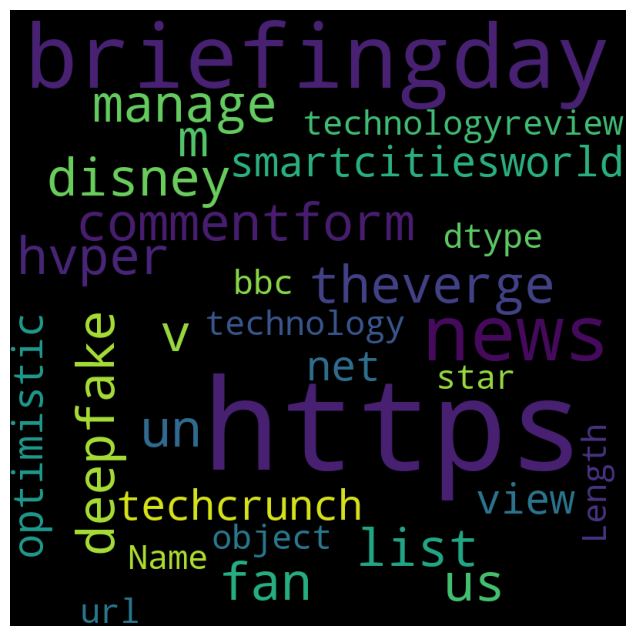

In [ ]:
# - Importe De Librerías:

from wordcloud import WordCloud

# - Generar Nube De Palabras Desde Columna 'url':

wc = WordCloud(
    width=800, height=800,
    background_color='black',
    max_words=1000,
    min_font_size=20,
    random_state=42
).generate(str(df['url']))

# - Mostrar La Nube De Palabras:

fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [12]:
# - Importe De Librerías Y Descargas:

from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

download("wordnet")
lemm = WordNetLemmatizer()

download("stopwords")
stopw = stopwords.words("english")
stopw.append('http')

# - Función Para Lematizar Y Filtrar Palabras:

def lemmatize_txt(words, lemmatizer=lemm):
    tokens = [lemmatizer.lemmatize(w) for w in words]
    tokens = [w for w in tokens if w not in stopw]
    tokens = [w for w in tokens if len(w) > 3]
    return tokens

# - Aplicar Lematización A La Columna 'url':

df["url"] = df["url"].apply(lemmatize_txt)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\luism\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luism\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True


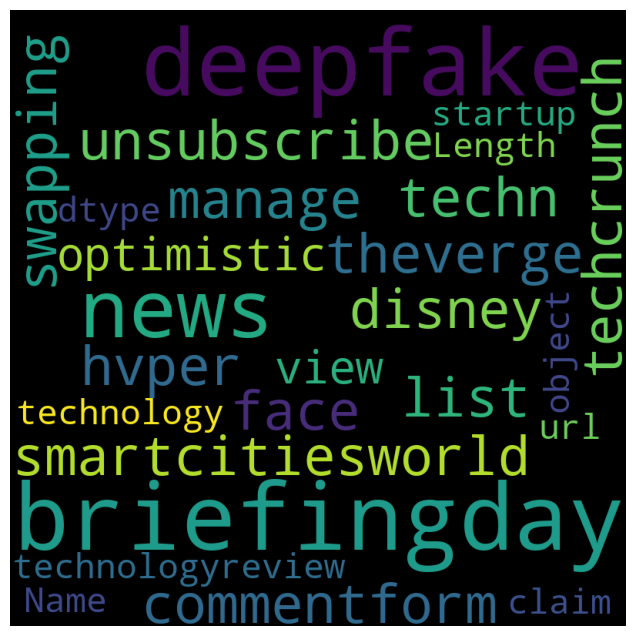

In [ ]:
# - Generar Nube De Palabras De La Columna 'url':

wc = WordCloud(
    width=800, height=800,
    background_color='black',
    max_words=1000,
    min_font_size=20,
    random_state=42
).generate(str(df['url']))

# - Mostrar Nube De Palabras:

fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [14]:
# - Importe De Librerías:

from sklearn.feature_extraction.text import TfidfVectorizer

# - Definir Vectorizador TF-IDF:

vec = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)

# - Definir Variables De Entrada (X) Y Salida (Y):

X = df.url
Y = df.is_spam

In [15]:
# - Importe De Librerías:

from sklearn.model_selection import train_test_split

# - División De Datos En Entrenamiento Y Prueba:

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, train_size=0.8, random_state=42)

# - Convertir Listas De Tokens A Strings:

tok_tr = ["".join(toks) for toks in X_tr]
tok_te = ["".join(toks) for toks in X_te]

In [16]:
# - Vectorizar Datos De Entrenamiento Y Prueba:

X_tr_vec = vec.fit_transform(tok_tr).toarray()
X_te_vec = vec.transform(tok_te).toarray()

In [17]:
# - Importe De Librerías:

from sklearn.svm import SVC

# - Definir Y Entrenar Modelo SVM:

mdl = SVC(random_state=42)
mdl.fit(X_tr_vec, Y_tr)

# - Predecir Con El Modelo:

Y_pr = mdl.predict(X_te_vec)

In [18]:
# - Calcular Precisión:

from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_te, Y_pr)
print(acc)

0.9177215189873418


In [19]:
# - Importe De Librerías:

from sklearn.model_selection import GridSearchCV

# - Definir Parámetros Para Grid Search:

param = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
        }

In [21]:
# - Importe De Librerías:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# - Grid Search Con Validación Cruzada:

grid = GridSearchCV(mdl, param, refit=True, verbose=10)
grid.fit(X_tr_vec, Y_tr)

# - Resultados Del Mejor Modelo:

print(grid.best_params_)
print(grid.best_estimator_)

# - Evaluación Con Datos De Prueba:

mdl_opt = grid.best_estimator_
acc_opt = accuracy_score(Y_te, mdl_opt.predict(X_te_vec))
print(acc_opt)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 2/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 3/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 4/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 5/5; 1/50] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/50] END ..C=0.1, gamma=1, kernel=rbf;, score=0.892 total time=   0.0s
[CV 1/5; 2/50] START C=0.1, gamma=1, kernel=linear..............................
[CV 1/5; 2/50] END C=0.1, gamma=1, kernel=linea

In [22]:
# - Guardar Modelo Entrenado:

from pickle import dump
dump(mdl_opt, open('../models/svm_rbf_C_0.1_gamma_1_42.sav', 'wb'))